In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


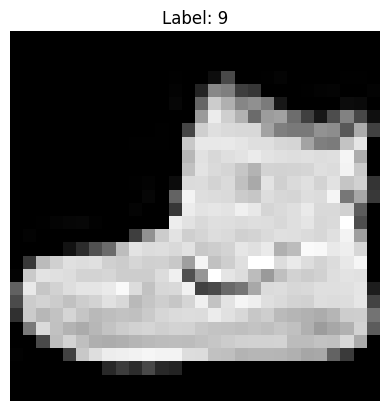

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [ ]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

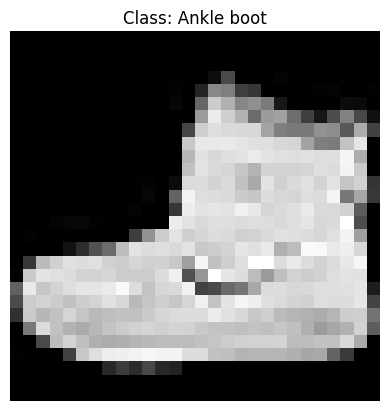

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Class: {class_names[y_train[0]]}")
plt.axis('off')
plt.show()

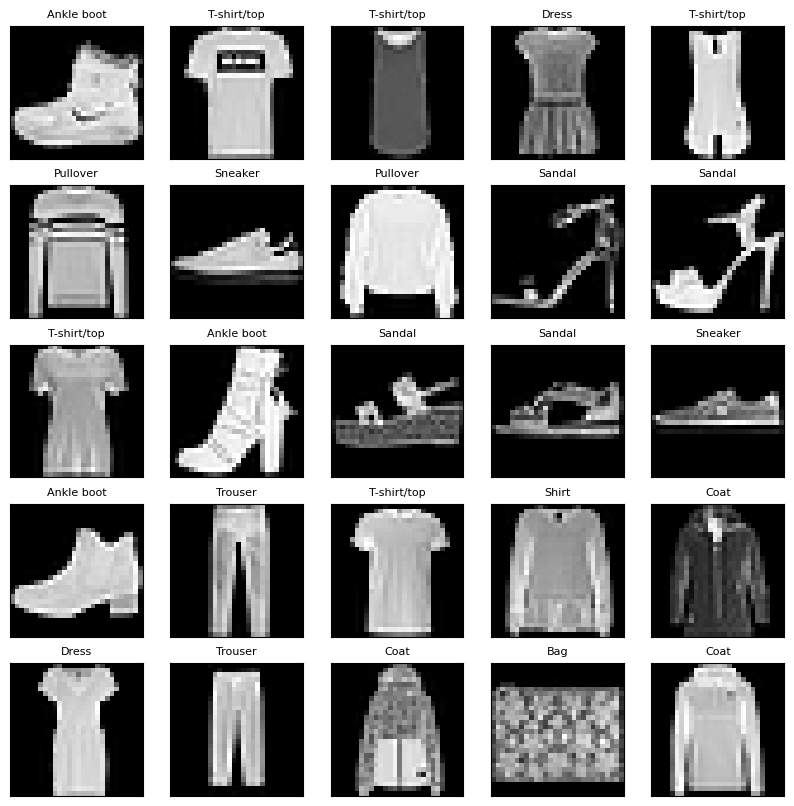

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=8)
plt.show()

In [ ]:
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (60000, 28, 28)
Test shape : (10000, 28, 28)


In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

print("Input shape for model:", X_train.shape)

Input shape for model: (60000, 28, 28)


In [ ]:
d_model = 64
num_heads = 4
num_classes = 10

inputs = layers.Input(shape=(28, 28))

x = layers.Dense(d_model)(inputs)

mha = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model // num_heads)
attn_output = mha(x, x, x)

x = layers.Add()([x, attn_output])
x = layers.LayerNormalization()(x)

x = layers.GlobalAveragePooling1D()(x)

x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 28, 64)    │      1,856 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 28, 64)    │     16,640 │ dense[0][0],      │
│ (MultiHeadAttentio… │                   │            │ dense[0][0],      │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 28, 64)    │          0 │ dense[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 28, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10)        │        650 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,434 (91.54 KB)

 Trainable params: 23,434 (91.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.5268 - loss: 1.2999 - val_accuracy: 0.7739 - val_loss: 0.6270
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.7571 - loss: 0.6626 - val_accuracy: 0.8038 - val_loss: 0.5377
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.7922 - loss: 0.5779 - val_accuracy: 0.8134 - val_loss: 0.5058
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.8065 - loss: 0.5405 - val_accuracy: 0.8163 - val_loss: 0.4923
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.8116 - loss: 0.5183 - val_accuracy: 0.8273 - val_loss: 0.4711


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {test_acc:.4f}")

Accuracy: 0.8266


**Manual**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class ManualMultiHeadAttention(layers.Layer):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.d_model = d_model
        self.num_heads = num_heads
        self.depth = d_model // num_heads

        self.wq = layers.Dense(d_model)
        self.wk = layers.Dense(d_model)
        self.wv = layers.Dense(d_model)
        self.dense = layers.Dense(d_model)

    def split_heads(self, x, batch_size):

        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(self.depth, tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)


        output = tf.transpose(output, perm=[0, 2, 1, 3])
        concat_output = tf.reshape(output, (batch_size, -1, self.d_model))

        final_output = self.dense(concat_output)
        return final_output


In [ ]:
d_model = 64
num_heads = 4
num_classes = 10

inputs = layers.Input(shape=(28, 28))

x = layers.Dense(d_model)(inputs)

mha = ManualMultiHeadAttention(d_model=d_model, num_heads=num_heads)
attn_output = mha(x, x, x)

x = layers.Add()([x, attn_output])
x = layers.LayerNormalization()(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 28, 64)    │      1,856 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ manual_multi_head_… │ (None, None, 64)  │     16,640 │ dense[0][0],      │
│ (ManualMultiHeadAt… │                   │            │ dense[0][0],      │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None, 64)  │          0 │ dense[0][0],      │
│                     │                   │            │ manual_multi_hea… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, None, 64)  │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      4,160 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 10)        │        650 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,434 (91.54 KB)

 Trainable params: 23,434 (91.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.5469 - loss: 1.2195 - val_accuracy: 0.7822 - val_loss: 0.5818
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.7810 - loss: 0.6137 - val_accuracy: 0.8148 - val_loss: 0.5075
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.8044 - loss: 0.5452 - val_accuracy: 0.8129 - val_loss: 0.5077
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.8124 - loss: 0.5253 - val_accuracy: 0.8273 - val_loss: 0.4706
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.8214 - loss: 0.4997 - val_accuracy: 0.8250 - val_loss: 0.4737


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {test_acc:.4f}")

Accuracy: 0.8214
